In [1]:
import pandas as pd

In [2]:
A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/Cars93.csv")

In [3]:
A.head(3)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90


In [4]:
A.columns=['id', 'Manufacturer', 'Model', 'Type', 'MinPrice', 'Price',
       'MaxPrice', 'MPGcity', 'MPGhighway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Revpermile',
       'Mantransavail', 'Fueltankcapacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turncircle', 'Rearseatroom', 'Luggageroom',
       'Weight', 'Origin', 'Make']

# Missing Data Treatment

In [5]:
from Wd8pm import replacer
replacer(A)

# Remove unique values

In [6]:
A.nunique()

id                  93
Manufacturer        32
Model               93
Type                 6
MinPrice            79
Price               81
MaxPrice            79
MPGcity             21
MPGhighway          22
AirBags              3
DriveTrain           3
Cylinders            6
EngineSize          26
Horsepower          57
RPM                 24
Revpermile          78
Mantransavail        2
Fueltankcapacity    38
Passengers           6
Length              51
Wheelbase           27
Width               16
Turncircle          14
Rearseatroom        25
Luggageroom         17
Weight              81
Origin               2
Make                93
dtype: int64

In [7]:
A=A.drop(labels=["id","Model","Make"],axis=1)

# Outlier removal

In [8]:
from Wd8pm import OL

In [9]:
outliers=OL(A)

In [10]:
A=A.drop(index=outliers,axis=0)

In [11]:
A.shape

(87, 25)

In [12]:
A.index=range(0,87)

# EDA 

In [13]:
X=A.drop(labels=["MinPrice","MaxPrice","Price"],axis=1)
Y=A[['Price']]

# check correlation of continuous values

In [14]:
Q=A.corr()["Price"]
Q.sort_values()

MPGcity            -0.703633
MPGhighway         -0.626498
Revpermile         -0.458679
RPM                -0.060176
Passengers          0.059701
Luggageroom         0.371466
Rearseatroom        0.382788
Turncircle          0.459958
Wheelbase           0.499039
Width               0.535804
Length              0.536407
EngineSize          0.632183
Weight              0.689606
Fueltankcapacity    0.700509
Horsepower          0.801048
MinPrice            0.975467
MaxPrice            0.980614
Price               1.000000
Name: Price, dtype: float64

In [15]:
Q=Q[Q!=1]
Q=Q[(Q<-0.3) |(Q>0.3)]
Q.index

Index(['MinPrice', 'MaxPrice', 'MPGcity', 'MPGhighway', 'EngineSize',
       'Horsepower', 'Revpermile', 'Fueltankcapacity', 'Length', 'Wheelbase',
       'Width', 'Turncircle', 'Rearseatroom', 'Luggageroom', 'Weight'],
      dtype='object')

# select imp categorical using anova

In [16]:
 imp_cols = []
from Wd8pm import ANOVA,chisq
for i in X.columns:
    if(X[i].dtypes == "object"):
        pval = chisq(A,"Origin",i)
        
    else:
        pval = ANOVA(A,"Origin",i)
        print("Origin ~",i,"---->",pval)
        if(pval<0.05):
            imp_cols.append(i)

Origin ~ MPGcity ----> 0.03227
Origin ~ MPGhighway ----> 0.22786
Origin ~ EngineSize ----> 4e-05
Origin ~ Horsepower ----> 0.33147
Origin ~ RPM ----> 0.0
Origin ~ Revpermile ----> 1e-05
Origin ~ Fueltankcapacity ----> 0.28964
Origin ~ Passengers ----> 0.03646
Origin ~ Length ----> 0.00027
Origin ~ Wheelbase ----> 0.00435
Origin ~ Width ----> 2e-05
Origin ~ Turncircle ----> 0.0
Origin ~ Rearseatroom ----> 0.23994
Origin ~ Luggageroom ----> 0.00045
Origin ~ Weight ----> 0.04086


In [17]:
Ximp = A[['Mantransavail','Cylinders','DriveTrain','AirBags','Type','Manufacturer','MPGcity', 'MPGhighway', 'EngineSize',
       'Horsepower','Revpermile','Fueltankcapacity','Length','Wheelbase', 'Width', 'Turncircle', 'Rearseatroom', 'Luggageroom',
       'Weight']]

# Preprocessing

In [18]:
from Wd8pm import preprocessing
Xnew = preprocessing(Ximp)
Xnew

,MPGcity,MPGhighway,EngineSize,Horsepower,Revpermile,Fueltankcapacity,Length,Wheelbase,Width,Turncircle,...,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,0.639252,0.466489,-0.864615,-0.064217,1.181529,-1.170016,-0.456978,-0.288061,-0.382895,-0.635770,...,0,0,0,0,0,0,0,0,0,0
1,-0.875551,-0.878854,0.532071,1.137264,0.026200,0.459733,0.802930,1.651206,0.436249,-0.323273,...,0,0,0,0,0,0,0,0,0,0
2,-0.442750,-0.654630,0.133018,0.576573,-0.088292,0.086249,-0.246994,-0.288061,-0.655943,-0.635770,...,0,0,0,0,0,0,0,0,0,0
3,-0.659151,-0.654630,0.133018,0.576573,0.442535,1.512279,0.662940,0.308637,0.163201,-0.635770,...,0,0,0,0,0,0,0,0,0,0
4,-0.009949,0.242265,0.831361,1.297461,0.463352,1.512279,0.172976,0.756160,-0.109847,-0.010776,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,-1.091952,-1.775750,-0.166272,-0.684982,1.233571,1.512279,0.242971,1.651206,0.709297,-0.323273,...,0,0,0,0,0,0,0,0,1,0
83,-0.226350,0.242265,-0.665089,-0.184365,0.754786,0.629498,-0.246994,-0.138886,-0.655943,-1.260764,...,0,0,0,0,0,0,0,0,1,0
84,-0.875551,-0.878854,0.133018,0.696721,0.130284,0.629498,-1.716887,-1.033933,-0.928991,-0.948267,...,0,0,0,0,0,0,0,0,1,0
85,-0.226350,-0.206183,-0.365799,-0.584859,-0.223600,-0.287235,0.452956,0.010288,-0.655943,-0.635770,...,0,0,0,0,0,0,0,0,0,1


# Splitting

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Backward elimination

In [20]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain) #this is done to get b0 value(not required in LM)
ols = OLS(ytrain,xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     12.08
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           4.40e-05
Time:                        21:35:27   Log-Likelihood:                -91.533
No. Observations:                  69   AIC:                             299.1
Df Residuals:                      11   BIC:                             428.6
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          8.4224      0.784     10.736      0.000       6.696      10.149
MPGcity                        2.7327      3.396      0.805      0.438      -4.742      10.207
MPGhighway                    -0.7185      2.742     -0.262      0.798      -6.754       5.317
EngineSize                     1.0054      2.416      0.416      0.685      -4.313       6.324
Horsepower                    -1.5849      2.161     -0.734      0.479      -6.340       3.171
Revpermile                    -0.3936      1.132     -0.348      0.735      -2.886       2.099
Fueltankcapacity               3.2672      1.702      1.919      0.081      -0.480       7.014
Length                        -1.4133      1.772     -0.798      0.442      -5.312       2.486
Wheelbase                      0.2266      2.969      0.076      0.941      -6.308       6.761
Width                         -1.8457      1.928     -0.957      0.359      -6.090       2.399
Turncircle                    -2.0920      1.391     -1.504      0.161      -5.153       0.969
Rearseatroom                   0.9941      1.145      0.868      0.404      -1.526       3.514
Luggageroom                   -1.8047      0.933     -1.935      0.079      -3.857       0.248
Weight                         5.9248      3.853      1.538      0.152      -2.555      14.404
Mantransavail_No               4.6174      1.472      3.138      0.009       1.379       7.856
Mantransavail_Yes              3.8050      1.258      3.024      0.012       1.035       6.575
Cylinders_3                   -4.4151      5.290     -0.835      0.422     -16.059       7.229
Cylinders_4                   -0.5021      1.816     -0.277      0.787      -4.499       3.495
Cylinders_5                   -3.6016      4.876     -0.739      0.476     -14.333       7.130
Cylinders_6                    2.2824      2.055      1.110      0.291      -2.242       6.806
Cylinders_8                   -0.9160      4.489     -0.204      0.842     -10.795       8.963
Cylinders_rotary              15.5748      7.360      2.116      0.058      -0.625      31.775
DriveTrain_4WD                 4.4124      2.631      1.677      0.122      -1.378      10.203
DriveTrain_Front               2.6013      1.403      1.854      0.091      -0.487       5.690
DriveTrain_Rear                1.4087      2.164      0.651      0.528      -3.354       6.172
AirBags_Driver & Passenger     4.6010      1.692      2.720      0.020       0.878       8.324
AirBags_Driver only            2.4360      1.333      1.828      0.095      -0.497       5.369
AirBags_None                   1.3854      1.263      1.097      0.296      -1.395       4.166
Type_Compact                   2.5160      2.022      1.244      0.239      -1.935       6.967
Type_Large                     1.7297      

In [21]:
for i in range(1,10) :
    Xnew = Xnew.drop(labels=ols.pvalues.sort_values().index[-1],axis=1)

    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,random_state=31,test_size=0.2)

    from statsmodels.api import OLS,add_constant
    xconst = add_constant(xtrain) #this is done to get b0 value(not required in LM)
    ols = OLS(ytrain,xconst).fit()
    print(round(ols.rsquared_adj,4),ols.pvalues.sort_values().index[-1])

0.9336 Width
0.9396 Manufacturer_Nissan
0.9446 Cylinders_8
0.9446 Cylinders_5
0.9489 Cylinders_4
0.9525 Manufacturer_Suzuki
0.9556 Manufacturer_Saturn
0.9582 MPGhighway
0.9605 AirBags_Driver & Passenger


In [22]:
for i in range(1,10) :
    Xnew = Xnew.drop(labels=ols.pvalues.sort_values().index[-1],axis=1)

    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,random_state=31,test_size=0.2)

    from statsmodels.api import OLS,add_constant
    xconst = add_constant(xtrain) #this is done to get b0 value(not required in LM)
    ols = OLS(ytrain,xconst).fit()
    print(round(ols.rsquared_adj,4),ols.pvalues.sort_values().index[-1])

0.9605 Manufacturer_Hyundai
0.9622 Manufacturer_Oldsmobile
0.9636 Manufacturer_Mazda
0.9649 Manufacturer_Eagle
0.9659 Manufacturer_Chrylser
0.9671 Manufacturer_Plymouth
0.9681 DriveTrain_4WD
0.9681 Manufacturer_Mitsubishi
0.969 DriveTrain_Front


In [23]:
for i in range(1,10) :
    Xnew = Xnew.drop(labels=ols.pvalues.sort_values().index[-1],axis=1)

    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,random_state=31,test_size=0.2)

    from statsmodels.api import OLS,add_constant
    xconst = add_constant(xtrain) #this is done to get b0 value(not required in LM)
    ols = OLS(ytrain,xconst).fit()
    print(round(ols.rsquared_adj,4),ols.pvalues.sort_values().index[-1])

0.9698 Manufacturer_Geo
0.9702 Type_Small
0.9702 Type_Van
0.9708 Wheelbase
0.9713 Cylinders_rotary
0.9719 Manufacturer_Dodge
0.9721 Manufacturer_Chevrolet
0.9709 Manufacturer_Ford
0.971 Luggageroom


In [24]:
    Xnew = Xnew.drop(labels=ols.pvalues.sort_values().index[-1],axis=1)

    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,random_state=31,test_size=0.2)

    from statsmodels.api import OLS,add_constant
    xconst = add_constant(xtrain) #this is done to get b0 value(not required in LM)
    ols = OLS(ytrain,xconst).fit()
    print(round(ols.rsquared_adj,4),ols.pvalues.sort_values().index[-1])

0.9714 Manufacturer_Pontiac


In [25]:
Xnew.columns

Index(['MPGcity', 'EngineSize', 'Horsepower', 'Revpermile', 'Fueltankcapacity',
       'Length', 'Turncircle', 'Rearseatroom', 'Weight', 'Mantransavail_No',
       'Mantransavail_Yes', 'Cylinders_3', 'Cylinders_6', 'DriveTrain_Rear',
       'AirBags_Driver only', 'AirBags_None', 'Type_Compact', 'Type_Large',
       'Type_Midsize', 'Type_Sporty', 'Manufacturer_Acura',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Cadillac',
       'Manufacturer_Chrysler', 'Manufacturer_Honda', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-Benz',
       'Manufacturer_Mercury', 'Manufacturer_Pontiac', 'Manufacturer_Saab',
       'Manufacturer_Subaru', 'Manufacturer_Toyota', 'Manufacturer_Volkswagen',
       'Manufacturer_Volvo'],
      dtype='object')

# Model

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

In [27]:
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

In [28]:
tr_err,ts_err

(0.7209441138365809, 3.9529746474386767)

# Ridge

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
rr = Ridge(alpha=1)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(2.073147329938362, 2.259320974507933)

In [30]:
x = 1
alphas = []
for i in range(0,10,1):
    alphas.append(x)
    x = round(x + 1,2)

In [31]:
tr = []
ts = []
for i in alphas:
    rr = Ridge(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)  

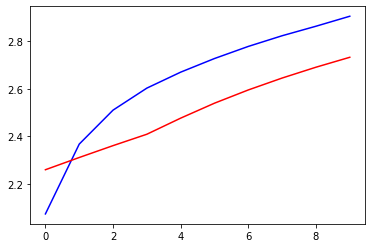

In [32]:
import matplotlib.pyplot as plt
plt.plot(tr,c="blue")
plt.plot(ts,c="red")

# GridSearchCV

In [33]:
tuning_grid = {"alpha":alphas}
rr = Ridge()
from sklearn.model_selection import GridSearchCV
cv1 = GridSearchCV(rr,tuning_grid,scoring="neg_mean_squared_error",cv=7)
cvmodel = cv1.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 6}

In [34]:
rr = Ridge(alpha=6)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(2.727874399658445, 2.539729486771754)

# 2.727874399658445, 2.539729486771754)

# Lasso

In [35]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=1)
model = ls.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(3.5113135635865547, 3.417633795660453)

In [49]:
tuning_grid = {"alpha":alphas}
rr = Lasso()
from sklearn.model_selection import GridSearchCV
cv1 = GridSearchCV(rr,tuning_grid,scoring="neg_mean_squared_error",cv=7)
cvmodel = cv1.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 1}

# Tree Regression

In [36]:
Y = A[["Price"]]
X = A.drop(labels=["Price","MaxPrice","MinPrice"],axis=1)
from Wd8pm import catcon
cat,con = catcon(X)
Xnew = pd.get_dummies(X[cat]).join(X[con])
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21)
model = dtr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)

tr_err,ts_err

(0.0, 5.0166666666666675)

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_split=6)
model = dtr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)

tr_err,ts_err

(0.9000966183574881, 5.7898148148148145)

In [55]:
tr = []
ts = []
for i in range(2,100,1):
    dtr = DecisionTreeRegressor(min_samples_split=i)
    model = dtr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err  = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)

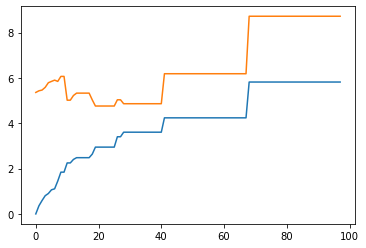

In [56]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

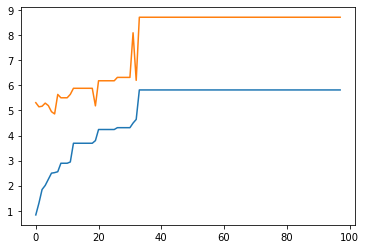

In [67]:
tr = []
ts = []
for i in range(2,100,1):
    dtr = DecisionTreeRegressor(min_samples_leaf=i)
    model = dtr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err  = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

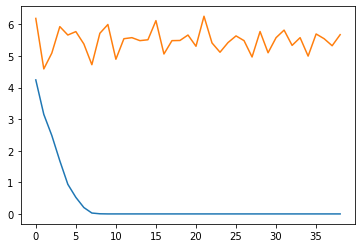

In [58]:
tr = []
ts = []
for i in range(1,40,1):
    dtr = DecisionTreeRegressor(max_depth=i)
    model = dtr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err  = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [59]:
tg = {"max_depth":range(2,20,1)}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'max_depth': 7}

In [60]:
dtr = DecisionTreeRegressor(max_depth=7)
model = dtr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(0.20212560386473424, 5.484259259259258)

In [68]:
tg = {"min_samples_leaf":range(2,100,1)}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_leaf': 2}

In [63]:
dtr = DecisionTreeRegressor(min_samples_leaf=2)
model = dtr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(0.8294685990338164, 5.312037037037038)

In [64]:
tg = {"min_samples_split":range(2,20,1)}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_split': 5}

In [65]:
dtr = DecisionTreeRegressor(min_samples_split=5)
model = dtr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(0.8038647342995171, 5.585648148148147)

# (0.8038647342995171, 5.585648148148147)

# KNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor(n_neighbors=5)

model =knr.fit(xtrain,ytrain)
tr_pred= model.predict(xtrain)
ts_pred =model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err= mean_absolute_error(ytrain,tr_pred)
ts_err= mean_absolute_error(ytest,ts_pred)
tr_err,ts_err


(3.378840579710145, 6.37)

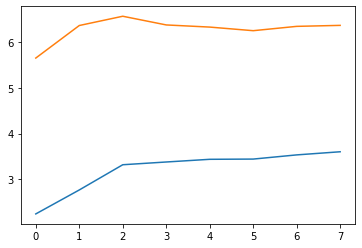

In [46]:
tr = []
ts = []
for i in range(2,10,1):
    knr = KNeighborsRegressor(n_neighbors=i)
    model = knr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err  = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [47]:
tg = {"n_neighbors":range(2,10,1)}
knr = KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(knr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'n_neighbors': 6}

In [48]:
knr = KNeighborsRegressor(n_neighbors=6)
model = knr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err  = mean_absolute_error(ytest,ts_pred)
tr.append(tr_err)
ts.append(ts_err)
tr_err,ts_err

(3.437439613526571, 6.323148148148148)

# (3.437439613526571, 6.323148148148148)